# Hurling Notebook


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

We will create a list of the positions, 

In [3]:
df_Tipp_to = pd.read_csv('Tipp_to.csv')['To']

In [4]:
df_Tipp_from = pd.read_csv('Tipp_from.csv')['From']

In [5]:
df_KK_from = pd.read_csv('Kilkenny_1.csv')['From']

In [6]:
df_KK_to = pd.read_csv('Kilkenny_2.csv')['To']

In [7]:
adjacency_Tipp_matrix = np.zeros((16,16))
tipp_len = len(df_Tipp_from)
problem_list = ['score','free','save','wide', 'miss',' Wide','Miss','G','Goal' ,'Free','65','goal','point','Point','Save','Wide','Block','Score']
for i in range(0,tipp_len):
    if df_Tipp_to[i] in problem_list  :
        adjacency_Tipp_matrix = adjacency_Tipp_matrix
    else:
        from_val = int(df_Tipp_from[i])
        to_val = int(df_Tipp_to[i])
        adjacency_Tipp_matrix[from_val, to_val] = (adjacency_Tipp_matrix[from_val, to_val] + 1 )
        

In [8]:
print(adjacency_Tipp_matrix)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [11.  0.  1.  2.  3.  2.  2.  1.  2.  0.  3.  1.  0.  0.  0.  2.]
 [ 4.  1.  0.  0.  0.  0.  0.  1.  2.  1.  1.  4.  1.  0.  2.  0.]
 [ 3.  1.  0.  0.  0.  0.  1.  2.  2.  2.  0.  0.  0.  0.  1.  0.]
 [ 5.  0.  0.  2.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  1.]
 [ 2.  0.  0.  0.  0.  0.  2.  0.  1.  0.  2.  0.  0.  1.  0.  0.]
 [ 4.  0.  0.  2.  0.  0.  0.  0.  5.  1.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  2.  0.  0.  0.  0.  0.  3.  1.  0.  4.]
 [ 5.  1.  0.  1.  0.  0.  1.  2.  0.  1.  3.  1.  3.  3.  2.  1.]
 [ 3.  0.  0.  0.  0.  0.  0.  0.  3.  0.  2.  3.  1.  0.  0.  0.]
 [ 8.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  3.  1.  0.  0.  1.]
 [ 6.  0.  0.  1.  0.  0.  0.  0.  0.  1.  2.  0.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  1.  3.  1.]
 [ 2.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  1.  1.]
 [ 6.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0. 

In [9]:
adjacency_KK_matrix = np.zeros((16,16))
KK_len = len(df_KK_from)
problem_list = ['score','free','save','wide', 'miss', 'Free','65','goal','point','Point','Save','Wide','Block','Score']
for i in range(0,KK_len):
    if df_KK_to[i] in problem_list  :
        adjacency_KK_matrix = adjacency_KK_matrix
    else:
        from_val = int(df_KK_from[i])
        to_val = int(df_KK_to[i])
        adjacency_KK_matrix[from_val, to_val] = (adjacency_KK_matrix[from_val, to_val] + 1 )

In [170]:
total_matrix = adjacency_KK_matrix + adjacency_Tipp_matrix

In [171]:
print(total_matrix)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  1.  0.]
 [38.  0.  4.  8.  4.  3.  2.  2.  2.  1.  4.  2.  5.  1.  0.  2.]
 [ 7.  1.  0.  0.  0.  0.  0.  2.  2.  3.  1.  5.  1.  2.  2.  0.]
 [ 5.  2.  0.  0.  0.  0.  4.  6.  2.  2.  4.  1.  0.  1.  1.  1.]
 [ 6.  1.  0.  2.  0.  3.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.]
 [ 6.  0.  0.  0.  1.  0.  2.  1.  1.  1.  3.  2.  0.  1.  0.  0.]
 [ 9.  0.  0.  2.  0.  1.  0.  2.  5.  2.  1.  2.  0.  2.  0.  0.]
 [ 6.  0.  1.  0.  2.  0.  4.  0.  0.  0.  3.  0.  3.  2.  2.  5.]
 [10.  1.  0.  2.  0.  2.  1.  3.  0.  1.  3.  2.  3.  3.  3.  2.]
 [10.  0.  0.  0.  0.  0.  0.  2.  4.  0.  2.  3.  1.  0.  0.  0.]
 [11.  0.  1.  0.  0.  1.  1.  1.  1.  0.  0.  3.  2.  1.  0.  1.]
 [ 8.  0.  0.  1.  0.  0.  2.  0.  0.  4.  3.  0.  1.  1.  2.  0.]
 [ 2.  0.  0.  0.  0.  0.  0.  1.  1.  3.  0.  1.  0.  1.  4.  1.]
 [ 6.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  2.  3.  0.  1.  1.]
 [ 7.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  2.  0. 

In [12]:
sum(total_matrix)

array([136.,   5.,   6.,  15.,   7.,  10.,  18.,  21.,  21.,  19.,  25.,
        24.,  22.,  19.,  17.,  15.])

In [13]:
no_misses = total_matrix[1:16,1:16]

The follwing is a calculation of the Weightedi in-degree, $C_{WID}$.

This measure summarises the number of successfully received passes for a player of certain position.

This may measure the trustworthiness of a player to his fellow teammates

We may use the standard sum function to carry this out, to calculate the toal number of passes, we would use the numpy sum function

The function, by default, will calculate the sum of each column, which here represents the number of times a player was passed to

In [13]:
for i in range(0,15):
    print("Player " + str(i+1) + " was passed succesffuly to or reclaimed the ball " + str(sum(no_misses[0:15,i])) + " times")


Player 1 was passed succesffuly to or reclaimed the ball 5.0 times
Player 2 was passed succesffuly to or reclaimed the ball 6.0 times
Player 3 was passed succesffuly to or reclaimed the ball 15.0 times
Player 4 was passed succesffuly to or reclaimed the ball 7.0 times
Player 5 was passed succesffuly to or reclaimed the ball 10.0 times
Player 6 was passed succesffuly to or reclaimed the ball 18.0 times
Player 7 was passed succesffuly to or reclaimed the ball 21.0 times
Player 8 was passed succesffuly to or reclaimed the ball 21.0 times
Player 9 was passed succesffuly to or reclaimed the ball 19.0 times
Player 10 was passed succesffuly to or reclaimed the ball 25.0 times
Player 11 was passed succesffuly to or reclaimed the ball 24.0 times
Player 12 was passed succesffuly to or reclaimed the ball 20.0 times
Player 13 was passed succesffuly to or reclaimed the ball 19.0 times
Player 14 was passed succesffuly to or reclaimed the ball 16.0 times
Player 15 was passed succesffuly to or reclaim

To find the successful passes from a player out 

In [286]:
wod = []
for i in range(0,15):
    print("Player " + str(i+1) + " has a Weighted-Out Degree of " + str(sum(no_misses[i,])/sum(sum(no_misses[0:15,]))) )
    wod.append(sum(no_misses[i,])/sum(sum(no_misses[0:15,])))

Player 1 has a Weighted-Out Degree of 0.16597510373443983
Player 2 has a Weighted-Out Degree of 0.07883817427385892
Player 3 has a Weighted-Out Degree of 0.0995850622406639
Player 4 has a Weighted-Out Degree of 0.05394190871369295
Player 5 has a Weighted-Out Degree of 0.04979253112033195
Player 6 has a Weighted-Out Degree of 0.07053941908713693
Player 7 has a Weighted-Out Degree of 0.0912863070539419
Player 8 has a Weighted-Out Degree of 0.1078838174273859
Player 9 has a Weighted-Out Degree of 0.04979253112033195
Player 10 has a Weighted-Out Degree of 0.04979253112033195
Player 11 has a Weighted-Out Degree of 0.058091286307053944
Player 12 has a Weighted-Out Degree of 0.04979253112033195
Player 13 has a Weighted-Out Degree of 0.03319502074688797
Player 14 has a Weighted-Out Degree of 0.02074688796680498
Player 15 has a Weighted-Out Degree of 0.02074688796680498


<BarContainer object of 15 artists>

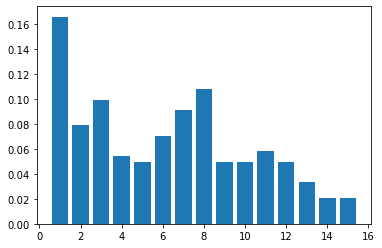

In [287]:
plt.bar(x,wod)

In [17]:
for i in range(0,15):
    print("The ratio of passes out to received for player " +  str(i+1) +  " is " + str((um(no_misses[i,])/sum(no_misses[0:15,i])))

The ratio of passes out to received for player 1 is 8.0
The ratio of passes out to received for player 2 is 3.1666666666666665
The ratio of passes out to received for player 3 is 1.6
The ratio of passes out to received for player 4 is 1.8571428571428572
The ratio of passes out to received for player 5 is 1.2
The ratio of passes out to received for player 6 is 0.9444444444444444
The ratio of passes out to received for player 7 is 1.0476190476190477
The ratio of passes out to received for player 8 is 1.2380952380952381
The ratio of passes out to received for player 9 is 0.631578947368421
The ratio of passes out to received for player 10 is 0.48
The ratio of passes out to received for player 11 is 0.5833333333333334
The ratio of passes out to received for player 12 is 0.6
The ratio of passes out to received for player 13 is 0.42105263157894735
The ratio of passes out to received for player 14 is 0.3125
The ratio of passes out to received for player 15 is 0.3333333333333333


In [283]:
wid = []
for i in range(0,15):
    print("The Weighted-in Degree for player " +  str(i+1) +  " is " + str(sum(no_misses[0:15,i])/sum(sum(no_misses[0:15,]))) )
    wid.append(sum(no_misses[0:15,i])/sum(sum(no_misses[0:15,])))

The Weighted-in Degree for player 1 is 0.02074688796680498
The Weighted-in Degree for player 2 is 0.024896265560165973
The Weighted-in Degree for player 3 is 0.06224066390041494
The Weighted-in Degree for player 4 is 0.029045643153526972
The Weighted-in Degree for player 5 is 0.04149377593360996
The Weighted-in Degree for player 6 is 0.07468879668049792
The Weighted-in Degree for player 7 is 0.08713692946058091
The Weighted-in Degree for player 8 is 0.08713692946058091
The Weighted-in Degree for player 9 is 0.07883817427385892
The Weighted-in Degree for player 10 is 0.1037344398340249
The Weighted-in Degree for player 11 is 0.0995850622406639
The Weighted-in Degree for player 12 is 0.08298755186721991
The Weighted-in Degree for player 13 is 0.07883817427385892
The Weighted-in Degree for player 14 is 0.06639004149377593
The Weighted-in Degree for player 15 is 0.06224066390041494


<BarContainer object of 15 artists>

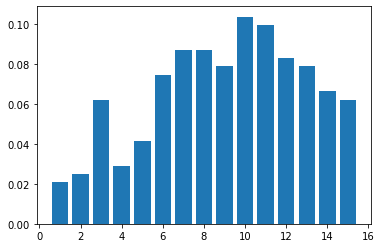

In [285]:
plt.bar(x,wid)

In [262]:
for i in range(0,14):
    for j in range(14,i,-1):
        nu_weight = ((no_misses[i,j] + no_misses[j,i]))/sum(sum(no_misses[0:15,]))
        if(nu_weight !=0):
            if(i != j):
                print("gk_network.add_edge('" + play_array[i] +  "', '" + play_array[j] + "' , weight = " + str(nu_weight) + ")" )

gk_network.add_edge('GK', 'LFF' , weight = 0.008298755186721992)
gk_network.add_edge('GK', 'RFF' , weight = 0.004149377593360996)
gk_network.add_edge('GK', 'LHF' , weight = 0.02074688796680498)
gk_network.add_edge('GK', 'CHF' , weight = 0.008298755186721992)
gk_network.add_edge('GK', 'RHF' , weight = 0.016597510373443983)
gk_network.add_edge('GK', 'LM' , weight = 0.004149377593360996)
gk_network.add_edge('GK', 'RM' , weight = 0.012448132780082987)
gk_network.add_edge('GK', 'LHB' , weight = 0.008298755186721992)
gk_network.add_edge('GK', 'CHB' , weight = 0.008298755186721992)
gk_network.add_edge('GK', 'RHB' , weight = 0.012448132780082987)
gk_network.add_edge('GK', 'LFB' , weight = 0.02074688796680498)
gk_network.add_edge('GK', 'CFB' , weight = 0.04149377593360996)
gk_network.add_edge('GK', 'RFB' , weight = 0.02074688796680498)
gk_network.add_edge('RFB', 'CFF' , weight = 0.008298755186721992)
gk_network.add_edge('RFB', 'RFF' , weight = 0.008298755186721992)
gk_network.add_edge('RFB', 'L

In [263]:
players = ['GK','RFB','CFB','LFB','RHB','CHB','LHB','RM','LM','RHF','CHF','LHF','RFF','CFF','LFF']

player_edge_list = []

for player in players:
    myindex = players.index(player)
    newlist = players[:myindex]+players[myindex+1:]   #make a new temp list without the player in it
    for item in newlist:
        mytuple = (player, item)
        backtuple = (item, player)
        if backtuple not in player_edge_list: #remove any reversed duplicates
            player_edge_list.append(mytuple)

gk_network = nx.Graph()
gk_network.add_node('GK', pos = (-5,0))
gk_network.add_node('RFB', pos = (-2,-3))
gk_network.add_node('CFB', pos = (-2,0))
gk_network.add_node('LFB', pos = (-2,3))
gk_network.add_node('RHB', pos = (1,-3))
gk_network.add_node('CHB', pos = (1,0))
gk_network.add_node('LHB', pos = (1,3))
gk_network.add_node('RM', pos = (4,1.5))
gk_network.add_node('LM', pos = (4,-1.5))
gk_network.add_node('RHF', pos = (7,-3))
gk_network.add_node('CHF', pos = (7,0))
gk_network.add_node('LHF', pos = (7,3))
gk_network.add_node('RFF', pos = (10,-3))
gk_network.add_node('CFF', pos = (10,0))
gk_network.add_node('LFF', pos = (10,3))
gk_network.add_edge('GK', 'LFF' , weight = 0.008298755186721992)
gk_network.add_edge('GK', 'RFF' , weight = 0.004149377593360996)
gk_network.add_edge('GK', 'LHF' , weight = 0.02074688796680498)
gk_network.add_edge('GK', 'CHF' , weight = 0.008298755186721992)
gk_network.add_edge('GK', 'RHF' , weight = 0.016597510373443983)
gk_network.add_edge('GK', 'LM' , weight = 0.004149377593360996)
gk_network.add_edge('GK', 'RM' , weight = 0.012448132780082987)
gk_network.add_edge('GK', 'LHB' , weight = 0.008298755186721992)
gk_network.add_edge('GK', 'CHB' , weight = 0.008298755186721992)
gk_network.add_edge('GK', 'RHB' , weight = 0.012448132780082987)
gk_network.add_edge('GK', 'LFB' , weight = 0.02074688796680498)
gk_network.add_edge('GK', 'CFB' , weight = 0.04149377593360996)
gk_network.add_edge('GK', 'RFB' , weight = 0.02074688796680498)
gk_network.add_edge('RFB', 'CFF' , weight = 0.008298755186721992)
gk_network.add_edge('RFB', 'RFF' , weight = 0.008298755186721992)
gk_network.add_edge('RFB', 'LHF' , weight = 0.004149377593360996)
gk_network.add_edge('RFB', 'CHF' , weight = 0.02074688796680498)
gk_network.add_edge('RFB', 'RHF' , weight = 0.008298755186721992)
gk_network.add_edge('RFB', 'LM' , weight = 0.012448132780082987)
gk_network.add_edge('RFB', 'RM' , weight = 0.008298755186721992)
gk_network.add_edge('RFB', 'LHB' , weight = 0.012448132780082987)
gk_network.add_edge('CFB', 'LFF' , weight = 0.004149377593360996)
gk_network.add_edge('CFB', 'CFF' , weight = 0.004149377593360996)
gk_network.add_edge('CFB', 'RFF' , weight = 0.004149377593360996)
gk_network.add_edge('CFB', 'CHF' , weight = 0.008298755186721992)
gk_network.add_edge('CFB', 'RHF' , weight = 0.016597510373443983)
gk_network.add_edge('CFB', 'LM' , weight = 0.008298755186721992)
gk_network.add_edge('CFB', 'RM' , weight = 0.016597510373443983)
gk_network.add_edge('CFB', 'LHB' , weight = 0.024896265560165973)
gk_network.add_edge('CFB', 'CHB' , weight = 0.024896265560165973)
gk_network.add_edge('CFB', 'LFB' , weight = 0.008298755186721992)
gk_network.add_edge('LFB', 'LFF' , weight = 0.004149377593360996)
gk_network.add_edge('LFB', 'RFF' , weight = 0.004149377593360996)
gk_network.add_edge('LFB', 'RHF' , weight = 0.004149377593360996)
gk_network.add_edge('LFB', 'LM' , weight = 0.004149377593360996)
gk_network.add_edge('LFB', 'RM' , weight = 0.004149377593360996)
gk_network.add_edge('LFB', 'LHB' , weight = 0.012448132780082987)
gk_network.add_edge('LFB', 'CHB' , weight = 0.004149377593360996)
gk_network.add_edge('LFB', 'RHB' , weight = 0.016597510373443983)
gk_network.add_edge('RHB', 'RFF' , weight = 0.004149377593360996)
gk_network.add_edge('RHB', 'CHF' , weight = 0.008298755186721992)
gk_network.add_edge('RHB', 'RHF' , weight = 0.016597510373443983)
gk_network.add_edge('RHB', 'LM' , weight = 0.004149377593360996)
gk_network.add_edge('RHB', 'RM' , weight = 0.012448132780082987)
gk_network.add_edge('RHB', 'LHB' , weight = 0.004149377593360996)
gk_network.add_edge('RHB', 'CHB' , weight = 0.012448132780082987)
gk_network.add_edge('CHB', 'RFF' , weight = 0.012448132780082987)
gk_network.add_edge('CHB', 'CHF' , weight = 0.016597510373443983)
gk_network.add_edge('CHB', 'RHF' , weight = 0.008298755186721992)
gk_network.add_edge('CHB', 'LM' , weight = 0.008298755186721992)
gk_network.add_edge('CHB', 'RM' , weight = 0.024896265560165973)
gk_network.add_edge('CHB', 'LHB' , weight = 0.024896265560165973)
gk_network.add_edge('LHB', 'LFF' , weight = 0.02074688796680498)
gk_network.add_edge('LHB', 'CFF' , weight = 0.008298755186721992)
gk_network.add_edge('LHB', 'RFF' , weight = 0.008298755186721992)
gk_network.add_edge('LHB', 'LHF' , weight = 0.016597510373443983)
gk_network.add_edge('LHB', 'RHF' , weight = 0.016597510373443983)
gk_network.add_edge('LHB', 'LM' , weight = 0.008298755186721992)
gk_network.add_edge('LHB', 'RM' , weight = 0.012448132780082987)
gk_network.add_edge('RM', 'LFF' , weight = 0.016597510373443983)
gk_network.add_edge('RM', 'CFF' , weight = 0.012448132780082987)
gk_network.add_edge('RM', 'RFF' , weight = 0.012448132780082987)
gk_network.add_edge('RM', 'LHF' , weight = 0.016597510373443983)
gk_network.add_edge('RM', 'CHF' , weight = 0.008298755186721992)
gk_network.add_edge('RM', 'RHF' , weight = 0.016597510373443983)
gk_network.add_edge('RM', 'LM' , weight = 0.02074688796680498)
gk_network.add_edge('LM', 'CFF' , weight = 0.004149377593360996)
gk_network.add_edge('LM', 'LHF' , weight = 0.016597510373443983)
gk_network.add_edge('LM', 'CHF' , weight = 0.029045643153526972)
gk_network.add_edge('LM', 'RHF' , weight = 0.008298755186721992)
gk_network.add_edge('RHF', 'LFF' , weight = 0.004149377593360996)
gk_network.add_edge('RHF', 'RFF' , weight = 0.004149377593360996)
gk_network.add_edge('RHF', 'LHF' , weight = 0.008298755186721992)
gk_network.add_edge('RHF', 'CHF' , weight = 0.024896265560165973)
gk_network.add_edge('CHF', 'CFF' , weight = 0.012448132780082987)
gk_network.add_edge('CHF', 'RFF' , weight = 0.012448132780082987)
gk_network.add_edge('CHF', 'LHF' , weight = 0.008298755186721992)
gk_network.add_edge('LHF', 'LFF' , weight = 0.008298755186721992)
gk_network.add_edge('LHF', 'CFF' , weight = 0.016597510373443983)
gk_network.add_edge('LHF', 'RFF' , weight = 0.016597510373443983)
gk_network.add_edge('RFF', 'LFF' , weight = 0.008298755186721992)
gk_network.add_edge('RFF', 'CFF' , weight = 0.012448132780082987)
gk_network.add_edge('CFF', 'LFF' , weight = 0.008298755186721992)



In [264]:
gk_network.number_of_edges()

83

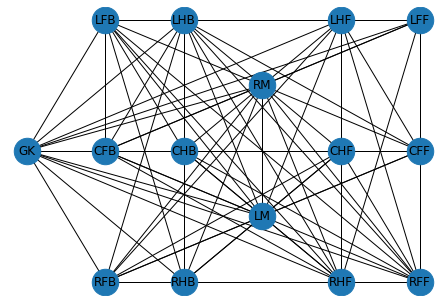

In [265]:
nx.draw(gk_network, nx.get_node_attributes(gk_network, 'pos'), with_labels=True, node_size = 700)

Now, a potentially more insigthful visual analysis, considering players in their groupings, as outlined by the rules of the game

In [165]:
gk_fb = sum(total_matrix[1,2:5])
gk_hb = sum(total_matrix[1,5:8])
gk_mf = sum(total_matrix[1,8:10])
gk_hf = sum(total_matrix[1,10:13])
gk_ff = sum(total_matrix[1,13:16])
gk_tot = sum(total_matrix[1,1:16])

gk_array = [gk_fb,gk_hb,gk_mf,gk_hf,gk_ff,gk_tot]

fb_gk = sum(total_matrix[2:5,1])
fb_hb = sum(sum(total_matrix[2:5,5:8]))
fb_mf = sum(sum(total_matrix[2:5,8:10]))
fb_hf = sum(sum(total_matrix[2:5,10:13]))
fb_ff = sum(sum(total_matrix[2:5,13:16]))
fb_tot = sum(sum(total_matrix[2:5,1:16]))

fb_array = [fb_gk, fb_hb, fb_mf, fb_hf, fb_ff, fb_tot]

hb_gk = sum(total_matrix[5:8,1])
hb_fb = sum(sum(total_matrix[5:8,2:5]))
hb_mf = sum(sum(total_matrix[5:8,8:10]))
hb_hf = sum(sum(total_matrix[5:8,10:13]))
hb_ff = sum(sum(total_matrix[5:8,13:16]))
hb_tot = sum(sum(total_matrix[5:8,1:16]))

hb_array = [hb_gk, hb_fb, hb_mf,hb_hf, hb_ff, hb_tot]

mf_gk = sum(total_matrix[8:10,1])
mf_fb = sum(sum(total_matrix[8:10,2:5]))
mf_hb = sum(sum(total_matrix[8:10,5:8]))
mf_hf = sum(sum(total_matrix[8:10,10:13]))
mf_ff = sum(sum(total_matrix[8:10,13:16]))
mf_tot = sum(sum(total_matrix[8:10,1:16]))

mf_array = [mf_gk, mf_fb, mf_hb, mf_hf, mf_ff, mf_tot]

hf_gk = sum(total_matrix[10:13,1])
hf_fb = sum(sum(total_matrix[10:13,2:5]))
hf_hb = sum(sum(total_matrix[10:13,5:8]))
hf_mf = sum(sum(total_matrix[10:13,8:10]))
hf_ff = sum(sum(total_matrix[10:13,13:16]))
hf_tot = sum(sum(total_matrix[10:13,1:16]))

hf_array = [hf_gk, hf_fb, hf_hb, hf_mf, hf_ff, hf_tot]

ff_gk = sum(total_matrix[13:16,1])
ff_hb = sum(sum(total_matrix[13:16,5:8]))
ff_mf = sum(sum(total_matrix[13:16,8:10]))
ff_hf = sum(sum(total_matrix[13:16,10:13]))
ff_fb = sum(sum(total_matrix[13:16,2:5]))
ff_tot = sum(sum(total_matrix[13:16,1:16]))

ff_array = [ff_gk, ff_fb, ff_hb,ff_mf,ff_hf,ff_tot]

In [166]:
levels = ["GK","FBL", "HBL", "MFL", "HFL", "FFL"]

levels_edge_list = []

for level in levels:
    myindex = levels.index(level)
    newlist = levels[:myindex]+levels[myindex+1:]   #make a new temp list without the player in it
    for item in newlist:
        mytuple = (level, item)
        backtuple = (item, level)
        if backtuple not in levels_edge_list: #remove any reversed duplicates
            levels_edge_list.append(mytuple)
            
no_gk = ["FBL", "HBL", "MFL", "HFL", "FFL"]
no_fb = ["GK","HBL", "MFL", "HFL", "FFL"]
no_hb = ["GK","FBL", "MFL", "HFL", "FFL"]
no_mf = ["GK","FBL", "HBL", "HFL", "FFL"]
no_hf = ["GK","FBL", "HBL", "MFL", "FFL"]
no_ff = ["GK","FBL", "HBL", "MFL", "HFL"]

In [185]:
weights = []
for i in range(0,5):
    rat = gk_array[i]/sum(sum(no_misses[0:15,]))
    weights.append(rat)  
for i in range(0,5):
    rat = fb_array[i]/sum(sum(no_misses[0:15,]))
    weights.append(rat) 
for i in range(0,5):
    rat = hb_array[i]/sum(sum(no_misses[0:15,]))
    weights.append(rat) 
for i in range(0,5):
    rat = mf_array[i]/sum(sum(no_misses[0:15,]))
    weights.append(rat)     
for i in range(0,5):
    rat = hf_array[i]/sum(sum(no_misses[0:15,]))
    weights.append(rat)     
for i in range(0,5):
    rat = ff_array[i]/sum(sum(no_misses[0:15,]))
    weights.append(rat)     

weights = 600000*weights

In [188]:
levels_net = nx.Graph(levels_edge_list)
levels_net.add_node('GK', pos = (-5,0))
levels_net.add_node('FBL', pos = (-2.5, 2.5))
levels_net.add_node('HBL', pos = (-2.5,-2.5))
levels_net.add_node('MFL', pos = (0,0))
levels_net.add_node('HFL', pos = (2.5,2.5))
levels_net.add_node('FFL', pos = (2.5,-2.5))


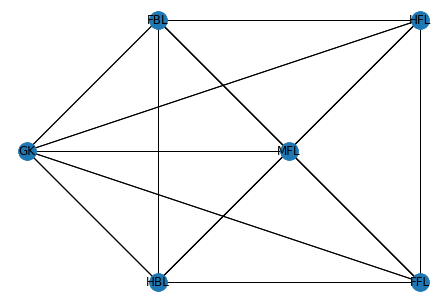

In [189]:
pos=nx.get_node_attributes(levels_net,'pos')
nx.draw(levels_net,pos)
labels = nx.get_edge_attributes(levels_net,'weight')
nx.draw(levels_net,pos,with_labels = True)

In [121]:
for i in range(0,5):
        rat = gk_array[i]/sum(sum(no_misses[0:15,]))
        print("levels_net.add_edge('" + levels[0] + "', '" + levels[i+1] + "' , weight = " + str(rat ) + ")")

for i in range(0,5):
        rat = fb_array[i]/sum(sum(no_misses[0:15,]))
        print("levels_net.add_edge('" + levels[1] + "', '" + no_fb[i] + "' , weight = " + str(rat ) + ")")        
for i in range(0,5):
        rat = hb_array[i]/sum(sum(no_misses[0:15,]))
        print("levels_net.add_edge('" + levels[2] + "', '" + no_hb[i] + "' , weight = " + str(rat ) + ")")
for i in range(0,5):
        rat = mf_array[i]/sum(sum(no_misses[0:15,]))
        print("levels_net.add_edge('" + levels[3] + "', '" + no_mf[i] + "' , weight = " + str(rat ) + ")")
for i in range(0,5):
        rat = hf_array[i]/sum(sum(no_misses[0:15,]))
        print("levels_net.add_edge('" + levels[4] + "', '" + no_hf[i] + "' , weight = " + str(rat ) + ")")
for i in range(0,5):
        rat = ff_array[i]/sum(sum(no_misses[0:15,]))
        print("levels_net.add_edge('" + levels[5] + "', '" + no_ff[i] + "' , weight = " + str(rat ) + ")")


levels_net.add_edge('GK', 'FBL' , weight = 0.06639004149377593)
levels_net.add_edge('GK', 'HBL' , weight = 0.029045643153526972)
levels_net.add_edge('GK', 'MFL' , weight = 0.012448132780082987)
levels_net.add_edge('GK', 'HFL' , weight = 0.04564315352697095)
levels_net.add_edge('GK', 'FFL' , weight = 0.012448132780082987)
levels_net.add_edge('FBL', 'GK' , weight = 0.016597510373443983)
levels_net.add_edge('FBL', 'HBL' , weight = 0.07053941908713693)
levels_net.add_edge('FBL', 'MFL' , weight = 0.04564315352697095)
levels_net.add_edge('FBL', 'HFL' , weight = 0.05394190871369295)
levels_net.add_edge('FBL', 'FFL' , weight = 0.03734439834024896)
levels_net.add_edge('HBL', 'GK' , weight = 0.0)
levels_net.add_edge('HBL', 'FBL' , weight = 0.024896265560165973)
levels_net.add_edge('HBL', 'MFL' , weight = 0.03734439834024896)
levels_net.add_edge('HBL', 'HFL' , weight = 0.058091286307053944)
levels_net.add_edge('HBL', 'FFL' , weight = 0.04979253112033195)
levels_net.add_edge('MFL', 'GK' , weight =

In [266]:
levels_net = nx.Graph(levels_edge_list)
levels_net.add_edge('GK', 'FBL' , weight = 0.06639004149377593)
levels_net.add_edge('GK', 'HBL' , weight = 0.029045643153526972)
levels_net.add_edge('GK', 'MFL' , weight = 0.012448132780082987)
levels_net.add_edge('GK', 'HFL' , weight = 0.04564315352697095)
levels_net.add_edge('GK', 'FFL' , weight = 0.012448132780082987)
levels_net.add_edge('FBL', 'GK' , weight = 0.016597510373443983)
levels_net.add_edge('FBL', 'HBL' , weight = 0.07053941908713693)
levels_net.add_edge('FBL', 'MFL' , weight = 0.04564315352697095)
levels_net.add_edge('FBL', 'HFL' , weight = 0.05394190871369295)
levels_net.add_edge('FBL', 'FFL' , weight = 0.03734439834024896)
levels_net.add_edge('HBL', 'GK' , weight = 0.0)
levels_net.add_edge('HBL', 'FBL' , weight = 0.024896265560165973)
levels_net.add_edge('HBL', 'MFL' , weight = 0.03734439834024896)
levels_net.add_edge('HBL', 'HFL' , weight = 0.058091286307053944)
levels_net.add_edge('HBL', 'FFL' , weight = 0.04979253112033195)
levels_net.add_edge('MFL', 'GK' , weight = 0.004149377593360996)
levels_net.add_edge('MFL', 'FBL' , weight = 0.008298755186721992)
levels_net.add_edge('MFL', 'HBL' , weight = 0.03319502074688797)
levels_net.add_edge('MFL', 'HFL' , weight = 0.058091286307053944)
levels_net.add_edge('MFL', 'FFL' , weight = 0.03319502074688797)
levels_net.add_edge('HFL', 'GK' , weight = 0.0)
levels_net.add_edge('HFL', 'FBL' , weight = 0.008298755186721992)
levels_net.add_edge('HFL', 'HBL' , weight = 0.024896265560165973)
levels_net.add_edge('HFL', 'MFL' , weight = 0.03734439834024896)
levels_net.add_edge('HFL', 'FFL' , weight = 0.04564315352697095)
levels_net.add_edge('FFL', 'GK' , weight = 0.0)
levels_net.add_edge('FFL', 'FBL' , weight = 0.0)
levels_net.add_edge('FFL', 'HBL' , weight = 0.004149377593360996)
levels_net.add_edge('FFL', 'MFL' , weight = 0.012448132780082987)
levels_net.add_edge('FFL', 'HFL' , weight = 0.029045643153526972)

In [274]:
c = nx.closeness_centrality(gk_network)
c

{'GK': 0.9333333333333333,
 'RFB': 0.7368421052631579,
 'CFB': 0.8235294117647058,
 'LFB': 0.7777777777777778,
 'RHB': 0.7368421052631579,
 'CHB': 0.7777777777777778,
 'LHB': 0.9333333333333333,
 'RM': 1.0,
 'LM': 0.875,
 'RHF': 0.9333333333333333,
 'CHF': 0.8235294117647058,
 'LHF': 0.7777777777777778,
 'RFF': 0.9333333333333333,
 'CFF': 0.7368421052631579,
 'LFF': 0.7368421052631579}

Kolmogorov-Smirnov tests of normality 

In [215]:
from scipy.stats import kstest
from scipy.stats import levene
#perform Kolmogorov-Smirnov test
kstest(no_misses, 'norm')


KstestResult(statistic=0.7105832013851541, pvalue=3.67773863817296e-08)

Levene Test for variances

In [212]:
levene(no_misses[0,0:14],
no_misses[1,0:14],
no_misses[2,0:14],
no_misses[3,0:14],
no_misses[4,0:14],
no_misses[5,0:14],
no_misses[6,0:14],
no_misses[7,0:14],
no_misses[8,0:14],
no_misses[9,0:14],
no_misses[10,0:14],
no_misses[11,0:14],
no_misses[12,0:14],
no_misses[13,0:14],
no_misses[14,0:14],center = 'median')

LeveneResult(statistic=1.8858615611192922, pvalue=0.029853779719125062)

$\frac{C_{WID}}{C_{WOD}}$ Ratio

In [219]:
for i in range(0,15):
    print("The ratio of passes received to passes out for player " +  str(i+1) +  " is " + str(sum(no_misses[0:15,i])/sum(no_misses[i,])))

The ratio of passes received to passes out for player 1 is 0.125
The ratio of passes received to passes out for player 2 is 0.3157894736842105
The ratio of passes received to passes out for player 3 is 0.625
The ratio of passes received to passes out for player 4 is 0.5384615384615384
The ratio of passes received to passes out for player 5 is 0.8333333333333334
The ratio of passes received to passes out for player 6 is 1.0588235294117647
The ratio of passes received to passes out for player 7 is 0.9545454545454546
The ratio of passes received to passes out for player 8 is 0.8076923076923077
The ratio of passes received to passes out for player 9 is 1.5833333333333333
The ratio of passes received to passes out for player 10 is 2.0833333333333335
The ratio of passes received to passes out for player 11 is 1.7142857142857142
The ratio of passes received to passes out for player 12 is 1.6666666666666667
The ratio of passes received to passes out for player 13 is 2.375
The ratio of passes r

In [238]:
ratio = []
for i in range(0,15):
    temp_rat = sum(no_misses[0:15,i])/sum(no_misses[i,])
    ratio.append(temp_rat)

In [236]:
x = np.linspace(1,15,15)

<BarContainer object of 15 artists>

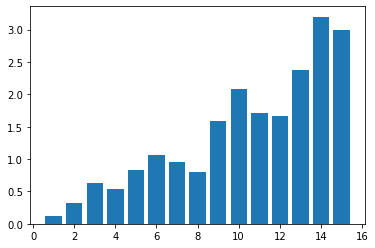

In [240]:
plt.bar(x,ratio)

Check for differences between areas of the pitch

In [249]:
rhs = ratio[1] + ratio[4] + ratio[7] + ratio[9] + ratio[12] 
centre = ratio[0] + ratio[2] + ratio[5] + ratio[10]  + ratio[13]
lhs = ratio[3] + ratio[6] + ratio[8] + ratio[11] + ratio[14]

In [268]:
rhs/lhs

0.8285086729014906

In [269]:
rhs/centre

0.954193694540515

In [270]:
lhs/centre

1.1517003089404814